In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [122]:
images = []

folder1 = "pieces/images1/"
folder2 = "pieces/images9/"
#folder3 = "pieces/images"

num_folder1 = 22
num_folder2 = 4

for i in range(num_folder1):
    load_images_from_folder(folder1 + str(i+1))
for i in range(num_folder2):
    load_images_from_folder(folder2 + str(i+1))
#load_images_from_folder(folder3)
    
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    #images[i] = cv2.GaussianBlur(images[i], (5,5), 0)
    #images[i] = cv2.adaptiveThreshold(images[i],255,1,1,11,2)

y = 4
x = 4
h = 90
w = 90
for i in range(0, 72):
    images[i] = images[i][y:y+h, x:x+w]
    
y = 7
x = 7
h = 90
w = 90
for i in range(72, len(images)):
    images[i] = images[i][y:y+h, x:x+w]

resized_images = []

for i in range(len(images)):
    img = images[i]
    scale_percent = 36 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_images.append(resized)

In [197]:
images = []
news = load_images_from_folder(folder3)
np.shape(news[1])
for i in range(len(news)):
    news[i] = cv2.cvtColor(news[i], cv2.COLOR_BGR2GRAY)
    news[i] = cv2.GaussianBlur(news[i], (5,5), 0)
    news[i] = cv2.adaptiveThreshold(news[i],255,1,1,11,2)


In [ ]:
news

In [215]:
np.shape(images)

(316, 90, 90)

In [211]:
plt.imshow(resized_images[320], cmap='gray')

IndexError: list index out of range

In [175]:
for i in range(len(news)):
    img = news[i]
    scale_percent = 0.3 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_images.append(resized)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\resize.cpp:3932: error: (-215:Assertion failed) inv_scale_x > 0 in function 'cv::resize'


In [123]:
X = np.asarray(resized_images) 
X = X / 230

y = []
for j in range(num_folder1):
    for i in range(6):
        y.append(i)
        y.append(i)
        
for j in range(num_folder2 * 2):
    y.append(6)
#for j in range(32):
#    y.append(6)    
y = np.asarray(y)

only_figs = X[0:23*12]



In [124]:
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]

In [23]:
#for i in range(len(X)):
#    X[i] = cv2.GaussianBlur(X[i], (5,5), 0)
#    X[i] = cv2.adaptiveThreshold(X[i],255,1,1,11,2)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


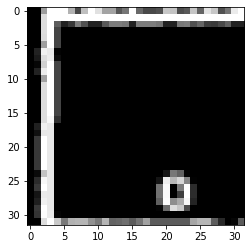

In [9]:
plt.imshow(X[156], cmap='gray')

In [133]:
np.shape(y)

(272,)

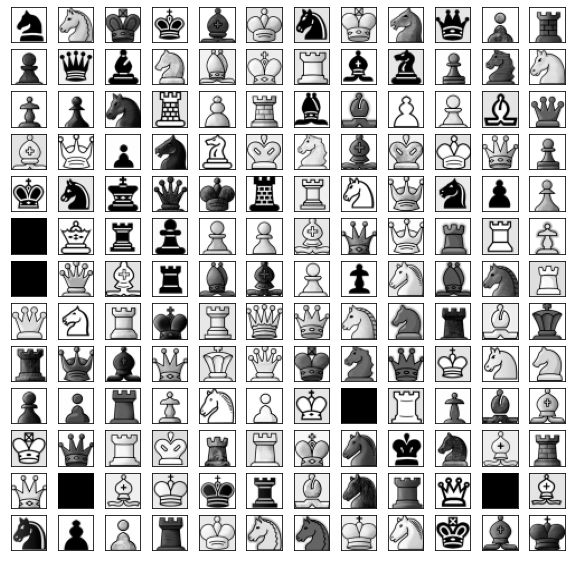

In [126]:
plt.figure(figsize=(10,10))
for i in range(0, 156):
    plt.subplot(13,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
plt.show()

In [127]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7)
])

In [128]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [129]:
model.fit(X[0:280], y[0:280], epochs=30)

Epoch 1/30
9/9 [==============================] - 0s 5ms/step - loss: 2.0823 - accuracy: 0.1360
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 1.8170 - accuracy: 0.2684
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 1.6181 - accuracy: 0.4154
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 1.4594 - accuracy: 0.4375
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 1.3445 - accuracy: 0.5037
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 1.1848 - accuracy: 0.5772
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 1.0391 - accuracy: 0.6654
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 0.9692 - accuracy: 0.6985
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.7831
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.8162
Epoch 11/30
9/9 [======================

In [134]:
test_loss, test_acc = model.evaluate(X[260:290], y[260:290], verbose=2)

1/1 - 0s - loss: 0.0391 - accuracy: 1.0000


In [65]:
images = []

folder1 = "pieces/images1/"

num_folder1 = 22

for i in range(num_folder1):
    load_images_from_folder(folder1 + str(i+1))

    
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

y = 4
x = 4
h = 90
w = 90
for i in range(0, 72):
    images[i] = images[i][y:y+h, x:x+w]
    
y = 7
x = 7
h = 90
w = 90
for i in range(72, len(images)):
    images[i] = images[i][y:y+h, x:x+w]

resized_images = []

for i in range(len(images)):
    img = images[i]
    scale_percent = 36 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_images.append(resized)
    
    
X = np.asarray(resized_images) 
X = X / 230



In [73]:
color = np.empty([264], dtype=float, order='C')
color[range(1,264,2)] = 1
color[range(0,264,2)] = 0

In [74]:
randomize = np.arange(len(X))
np.random.shuffle(randomize)

X = X[randomize]
color = color[randomize]

In [68]:
np.shape(X)

(264, 32, 32)

In [75]:
model_color = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2)
])

In [76]:
model_color.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model_color.fit(X[0:252], color[0:252], epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7287 - accuracy: 0.6667
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8492
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9206
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9246
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9524
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9643
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9841
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9881
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9921
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9921


In [78]:
test_loss, test_acc = model_color.evaluate(X[252:274], color[252:274], verbose=2)

1/1 - 0s - loss: 0.1428 - accuracy: 0.9167


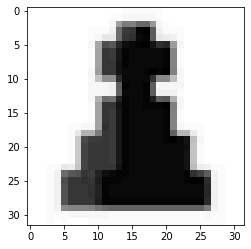

In [64]:
plt.imshow(X[156], cmap="gray")

In [72]:
np.shape(color)

(276,)

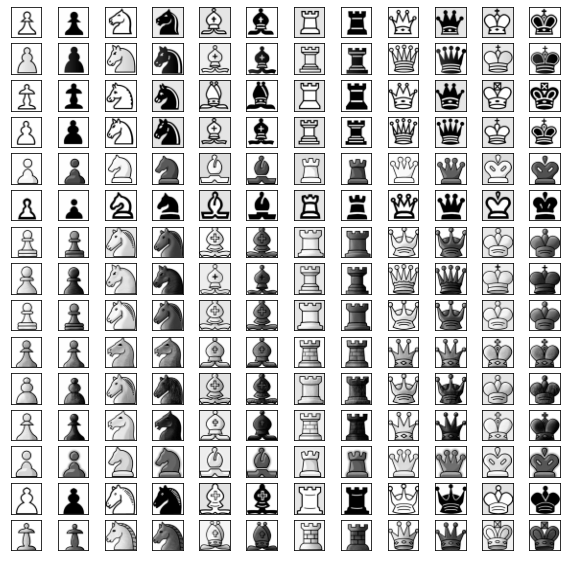

In [69]:
plt.figure(figsize=(10,10))
for i in range(0, 180):
    plt.subplot(15,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
plt.show()

(32, 32)


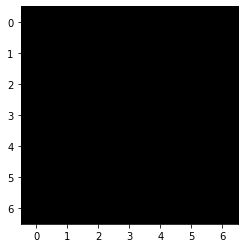

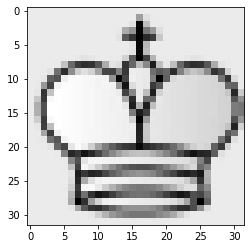

766.4521739130437

In [171]:
print(np.shape(X[31]))
col = X[65]
col = col[0:7, 0:7]
plt.imshow(col, cmap='gray')
plt.show()
plt.imshow(X[65], cmap='gray')
plt.show()
np.sum(X[31])

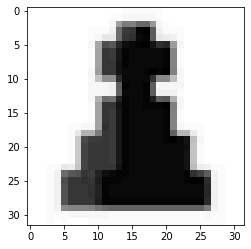

1060.0565217391304

In [179]:
plt.imshow(X[37], cmap='gray')
plt.show()
np.sum(X[37])

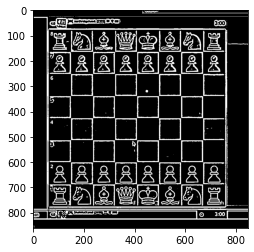

In [108]:
img = cv2.imread("images/chess.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap = "gray")
gray = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
plt.imshow(thresh, cmap = "gray")
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [184]:
cv2.imwrite('filename.jpg', thresh)

True

In [109]:
biggest = None
max_area = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 500:
                peri = cv2.arcLength(i,True)
                approx = cv2.approxPolyDP(i,0.02*peri,True)
                if area > max_area and len(approx)==4:
                        biggest = approx
                        max_area = area

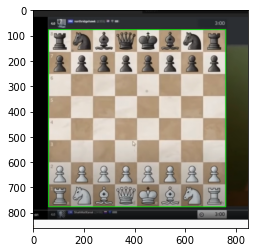

In [110]:
x,y,w,h = cv2.boundingRect(biggest)
plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2))

In [111]:
h = np.array([ [0,0],[255,0],[255,255],[0,255] ],np.float32)

In [112]:
def rectify(h):
        h = h.reshape((4,2))
        hnew = np.zeros((4,2),dtype = np.float32)

        add = h.sum(1)
        hnew[0] = h[np.argmin(add)]
        hnew[2] = h[np.argmax(add)]
        
        diff = np.diff(h,axis = 1)
        hnew[1] = h[np.argmin(diff)]
        hnew[3] = h[np.argmax(diff)]
 
        return hnew

In [113]:
approx=rectify(biggest)

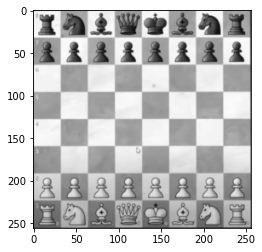

In [114]:
retval = cv2.getPerspectiveTransform(approx,h)
warp = cv2.warpPerspective(gray,retval,(256,256))
plt.imshow(warp, cmap='gray')

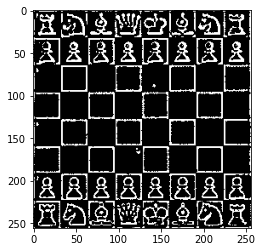

In [97]:
thresh_warp = warp.copy()
cropped = cv2.GaussianBlur(thresh_warp, (5,5), 0)
thresh = cv2.adaptiveThreshold(cropped,255,1,1,3,2)
plt.imshow(thresh, cmap='gray')
cells = []

In [87]:
for i in range(8):
    for j in range(8):
        cropped = thresh[i*32:(i+1)*32, j*32:(j+1)*32]
        cells.append(cropped)

In [56]:
cropped = warp[32:32+32, 0:32]
gray = cv2.GaussianBlur(cropped, (5,5), 0)
thresh = cv2.adaptiveThreshold(gray,255,1,1,3,2)
cv2.imshow("cropped", thresh)
cv2.waitKey(0)

-1

In [65]:
cells = []
for i in range(8):
    for j in range(8):
        cropped = warp[i*32:(i+1)*32, j*32:(j+1)*32]
        gray = cv2.GaussianBlur(cropped, (5,5), 0)
        thresh = cv2.adaptiveThreshold(gray,255,1,1,3,2)
        cells.append(thresh)

In [115]:
cells = []
for i in range(8):
    for j in range(8):
        cropped = warp[i*32:(i+1)*32, j*32:(j+1)*32]
        cells.append(cropped)

In [116]:
cells_color = []
for i in range(8):
    for j in range(8):
        cropped = warp[i*32:(i+1)*32, j*32:(j+1)*32]
        cells_color.append(cropped)

In [126]:
np.shape(cells[0])

(32, 32)

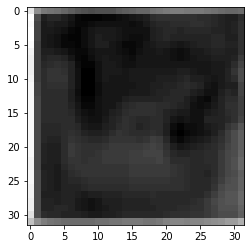

In [118]:
plt.imshow(cells[33], cmap="gray")

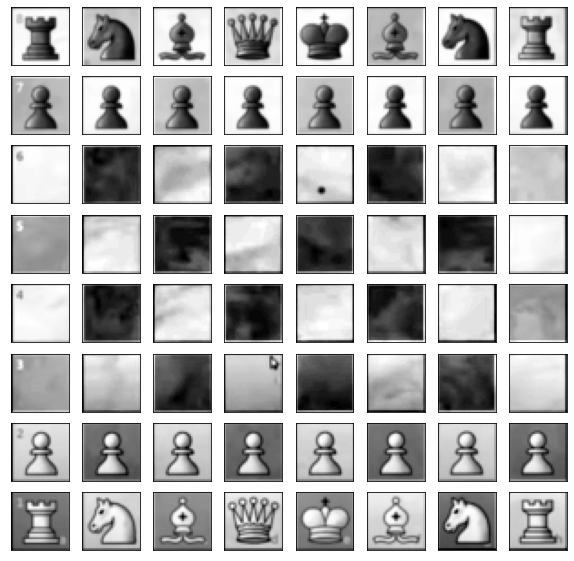

In [119]:
plt.figure(figsize=(10,10))
for i in range(0, 64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cells[i], cmap="gray")
plt.show()

In [121]:
np.argmax(model.predict(cells[8]), axis=1)

ValueError: in user code:

    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1150 predict_function  *
        outputs = self.distribute_strategy.run(
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1125 predict_step  **
        return self(x, training=False)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\network.py:717 call
        return self._run_internal_graph(
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\users\talll\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_31 is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape [32, 32]


In [134]:
cell = np.array([cells[33]])
np.argmax(model_color.predict(cell))

0

In [151]:
col = cells_color[6][10:20, 10:20]
np.sum(col)

8199

In [135]:
cells = np.asarray(cells)
cells_color = np.asarray(cells_color)
string = []
i=0
for i in range(64):
    cell = np.array([cells[i]])
    cell_color = np.array([cells_color[i]])
    figure_predict = model.predict(cell)
    color_predict = model_color.predict(cell_color)
    predicted_figure = np.argmax(figure_predict, axis=1)
    predicted_color = np.argmax(color_predict, axis=1)
    if predicted_figure == 0:
        if predicted_color == 0:
            string.append('P')
        else:
            string.append('p')
    elif predicted_figure == 1:
        if predicted_color == 0:
            string.append('N')
        else:
            string.append('n')
    elif predicted_figure == 2:
        if predicted_color == 0:
            string.append('B')
        else:
            string.append('b')
    elif predicted_figure == 3:
        if predicted_color == 0:
            string.append('R')
        else:
            string.append('r')
    elif predicted_figure == 4:
        if predicted_color == 0:
            string.append('Q')
        else:
            string.append('q')
    elif predicted_figure == 5:
        if predicted_color == 0:
            string.append('K')
        else:
            string.append('k')
    elif predicted_figure == 6:
        string.append('1')
    if (i+1)%8==0:
        string.append('/')
    i = i + 1

In [136]:
''.join(string)

'pnpqqPnp/pppppppp/11111111/11111111/11111111/11111111/P1P1P1P1/1NBRPB1R/'